In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [5]:
stores_clust_info_combined2 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined2.csv',index_col=0, dtype=sdtypes,)

In [6]:
stores_clust_info_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

In [7]:
#      'tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
#      'rev_Cheap',
     
#      'rev_Moderately_High',
#      'rev_Most_Variety',
#      'rev_Popular_Bottles',
#      'rev_Quick_Shots',
#      'rev_Volume_For_Dollar',
#      'item_Cheap',
     
#      'item_Moderately_High',
#      'item_Most_Variety',
#      'item_Popular_Bottles',
#      'item_Quick_Shots',
#      'item_Volume_For_Dollar',
#      'cl_Cheap',
#      'cl_High_End',
#      'cl_Moderately_High',
#      'cl_Most_Variety',
#      'cl_Popular_Bottles',
#      'cl_Quick_Shots',
#      'cl_Volume_For_Dollar'

In [8]:
features = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [9]:
scaled_features = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [10]:
scaler = StandardScaler()

In [11]:
stores_clust_info_combined2[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined2[features])


In [12]:
stores_clust_info_combined2[scaled_features].describe()

,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03,1.948000e+03
mean,1.611761e-16,-9.497878e-17,1.568162e-16,9.631812e-18,-4.315508e-16,7.867879e-17,5.820977e-16,-6.450179e-16,-1.561636e-15,6.377513e-17,3.774929e-16,1.680438e-16,-4.834144e-16,-2.239916e-15
std,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00
min,-8.804582e-01,-2.613159e+00,-2.550875e-01,-5.018867e-01,-4.623636e+00,-1.144454e+00,-1.917184e+00,-4.219634e-01,-4.786001e-01,-6.607848e-01,-3.193835e+00,-8.407749e-01,-7.821883e-01,-4.804975e+00
25%,-5.876147e-01,-6.665504e-01,-2.550875e-01,-3.716319e-01,-6.297317e-01,-7.981988e-01,-6.527929e-01,-4.219634e-01,-4.786001e-01,-5.710826e-01,-5.920646e-01,-6.607625e-01,-6.728086e-01,-8.700969e-01
50%,-4.444467e-01,-9.460591e-02,-2.345637e-01,-2.353739e-01,1.284312e-01,-3.617194e-01,-1.891827e-01,-4.219634e-01,-4.331469e-01,-4.634399e-01,9.954530e-02,-4.036020e-01,-4.978011e-01,1.136226e-01
75%,1.908611e-01,5.295454e-01,1.213493e-02,1.039023e-01,7.803452e-01,6.805001e-01,4.851594e-01,-1.262323e-01,-4.679484e-02,1.121492e-01,6.264862e-01,2.392992e-01,3.772364e-01,1.097342e+00
max,5.702014e+00,8.607549e+00,2.807909e+01,1.239010e+01,1.874168e+00,4.164609e+00,3.477553e+00,1.140728e+01,9.725639e+00,5.785814e+00,2.339044e+00,5.485373e+00,5.408702e+00,1.097342e+00


In [13]:
from sklearn.metrics import silhouette_score

cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.5075869974537498
number of clusters =  3   silhouette score =  0.36735885000752994
number of clusters =  4   silhouette score =  0.3704588259297607
number of clusters =  5   silhouette score =  0.3732744483816319
number of clusters =  6   silhouette score =  0.3683306704983435
number of clusters =  7   silhouette score =  0.3584223732794341
number of clusters =  8   silhouette score =  0.338274152837215
number of clusters =  9   silhouette score =  0.29995794005215765
number of clusters =  10   silhouette score =  0.2968435577098667


In [14]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

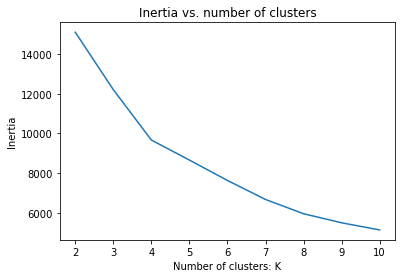

In [15]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [16]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

model = KMeans(n_clusters=2, random_state=42)

model.fit(stores_clust_info_combined2[cluster_cols])

stores_clust_info_combined2['n_clusters_2'] = model.predict(stores_clust_info_combined2[cluster_cols])

In [17]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [18]:
stores_clust_info_combined2.groupby(['n_clusters_2']).agg({'tot_num_unique_items':['mean','median'],
                                                         'rev_Cheap':['mean','median'],
                                                          'rev_Moderately_High':['mean','median'],
                                                          'rev_Most_Variety':['mean','median'],
                                                          'rev_Popular_Bottles':['mean','median'],
                                                          'rev_Volume_For_Dollar':['mean','median'],
                                                          'cl_Cheap':['mean','median'],
                                                          'cl_High_End':['mean','median'],
                                                          'cl_Moderately_High':['mean','median'],
                                                          'cl_Most_Variety':['mean','median'],
                                                          'cl_Popular_Bottles':['mean','median'],
                                                          
                                                          'cl_Volume_For_Dollar':['mean','median']})

tot_num_unique_items         rev_Cheap             \
                             mean median       mean     median   
n_clusters_2                                                     
0                      162.792476  117.0  16.631208  15.804861   
1                      875.760000  812.0  20.735452  20.519885   

             rev_Moderately_High           rev_Most_Variety            \
                            mean    median             mean    median   
n_clusters_2                                                            
0                       0.655095  0.013530         3.128219  1.567410   
1                       1.927885  1.659812         8.094281  7.714943   

             rev_Popular_Bottles            rev_Volume_For_Dollar             \
                            mean     median                  mean     median   
n_clusters_2                                                                   
0                      70.703414  73.407420              7.551103   4.476178   
1                      52.620342  52.957224             15.126472  14.992128   

               cl_Cheap            cl_High_End           cl_Moderately_High  \
                   mean     median        mean    median               mean   
n_clusters_2                                                                  
0             28.132585  27.941176    0.532203  0.000000           0.762474   
1             62.644608  63.235294    8.878981  7.643312          11.403649   

                       cl_Most_Variety            cl_Popular_Bottles  \
                median            mean     median               mean   
n_clusters_2                                                           
0             0.114025        2.353591   1.136880          53.952843   
1             9.749145       19.698954  17.576171          78.444444   

                        cl_Volume_For_Dollar             
                 median                 mean     median  
n_clusters_2                                             
0             57.142857             4.542417   1.982379  
1             80.952381            26.186490  24.339207

In [19]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

model = KMeans(n_clusters=4, random_state=42)

model.fit(stores_clust_info_combined2[cluster_cols])

stores_clust_info_combined2['n_clusters_4'] = model.predict(stores_clust_info_combined2[cluster_cols])

In [20]:
stores_clust_info_combined2.groupby(['n_clusters_4']).agg({'Store_Number':'count','num_unique_clusters':['mean','median','std'],'tot_num_unique_items':['mean','median','std'],
                                                         'rev_Cheap':['mean','median','std'],
                                                           'rev_High_End':['mean','median','std'],
                                                          'rev_Moderately_High':['mean','median','std'],
                                                          'rev_Most_Variety':['mean','median','std'],
                                                          'rev_Popular_Bottles':['mean','median','std'],
                                                          'rev_Volume_For_Dollar':['mean','median','std'],
                                                          'cl_Cheap':['mean','median','std'],
                                                          'cl_High_End':['mean','median','std'],
                                                          'cl_Moderately_High':['mean','median','std'],
                                                          'cl_Most_Variety':['mean','median','std'],
                                                          'cl_Popular_Bottles':['mean','median','std'],
                                                          
                                                          'cl_Volume_For_Dollar':['mean','median','std']})

Store_Number num_unique_clusters                   \
                    count                mean median       std   
n_clusters_4                                                     
0                     601            6.615641    7.0  0.600296   
1                     191            6.994764    7.0  0.072357   
2                      18            2.444444    2.0  1.464169   
3                    1138            5.366432    5.0  0.775730   

             tot_num_unique_items                      rev_Cheap             \
                             mean  median         std       mean     median   
n_clusters_4                                                                  
0                      350.993344   329.0  141.499164  19.648382  18.327785   
1                     1050.303665  1018.0  300.119611  21.193444  21.186225   
2                       20.388889     8.0   36.567647   4.127520   0.000000   
3                      104.646749    98.0   45.783687  15.551798  14.866057   

                        rev_High_End                      rev_Moderately_High  \
                    std         mean    median        std                mean   
n_clusters_4                                                                    
0              7.148336     0.057466  0.005194   0.112033            1.159254   
1              3.980926     0.155998  0.101600   0.167451            2.153627   
2             12.244197     3.698045  0.000000  15.243733           20.160678   
3              5.626086     0.009377  0.000000   0.095165            0.164337   

                                  rev_Most_Variety                        \
                median        std             mean     median        std   
n_clusters_4                                                               
0             0.657671   1.388222         4.859017   4.233590   2.553731   
1             1.942176   1.303421         9.013396   8.647012   3.325612   
2             6.821402  26.718602        68.958575  85.055674  35.227977   
3             0.000000   0.623270         1.494294   1.140732   1.249280   

             rev_Popular_Bottles                      rev_Volume_For_Dollar  \
                            mean     median       std                  mean   
n_clusters_4                                                                  
0                      57.804113  59.123391  8.887255             15.146805   
1                      51.340662  50.793081  7.471278             14.745476   
2                       1.195143   0.000000  5.070562              0.134354   
3                      77.097960  78.086908  7.952349              4.446507   

                                    cl_Cheap                        \
                 median       std       mean     median        std   
n_clusters_4                                                         
0             15.231850  7.804927  41.478663  41.176471  12.800578   
1             14.989809  5.039705  68.186018  67.647059  11.073362   
2              0.000000  0.457274   0.490196   0.000000   1.614892   
3              3.232758  3.954922  23.897059  25.000000   8.317145   

             cl_High_End                     cl_Moderately_High             \
                    mean    median       std               mean     median   
n_clusters_4                                                                 
0               2.008330  0.636943  2.601077           2.748365   1.938426   
1              11.281555  9.554140  7.676646          14.425069  12.656784   
2               0.495400  0.000000  1.522335           0.652477   0.171038   
3               0.149441  0.000000  0.678013           0.227549   0.000000   

                       cl_Most_Variety                       \
                   std            mean     median       std   
n_clusters_4                                                  
0             2.659147        6.467771   5.729877  3.680761   
1             7.641704       24.299717  23.601637  

In [22]:
stores_clust_info_combined3 = stores_clust_info_combined2.copy()

In [23]:
stores_clust_info_combined3.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv')